In [2]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ["sample_code_number", "clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape", 
         "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", 
         "mitosis", "classes"]
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

In [35]:
dataframe[dataframe.bare_nuclei == "?"] = 0

In [41]:
X = dataframe.values[:,0:-1]

Y = dataframe.values[:,-1].astype(int)

In [42]:
# feature extraction

test = SelectKBest(score_func=chi2, k=4)

fit = test.fit(X, Y)

In [43]:
# summarize scores

numpy.set_printoptions(precision=3)

print(fit.scores_)

[1.902e+07 7.098e+02 1.453e+03 1.361e+03 1.055e+03 5.609e+02 1.826e+03
 7.541e+02 1.217e+03 2.600e+02]


In [44]:
features = fit.transform(X)

# summarize selected features

print(features[0:5,:])

[[1.000e+06 1.000e+00 1.000e+00 1.000e+00]
 [1.003e+06 4.000e+00 4.000e+00 1.000e+01]
 [1.015e+06 1.000e+00 1.000e+00 2.000e+00]
 [1.016e+06 8.000e+00 8.000e+00 4.000e+00]
 [1.017e+06 1.000e+00 1.000e+00 1.000e+00]]


/Users/madrugado/anaconda3/lib/python3.5/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [45]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [46]:
# feature extraction

model = LogisticRegression()

rfe = RFE(model, 3)

fit = rfe.fit(X, Y)

print("Num Features:", fit.n_features_)
# print(fit.n_features_)
print("Selected Features:", fit.support_)

print("Feature Ranking:", fit.ranking_)

Num Features: 3
Selected Features: [ True  True False False False False  True False False False]
Feature Ranking: [1 1 7 5 4 6 1 2 3 8]


In [47]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction

pca = PCA(n_components=3)

fit = pca.fit(X)

features = fit.transform(X)

# summarize components

print("Explained Variance:", fit.explained_variance_ratio_)

print(features[0:5,:])

Explained Variance: [1.000e+00 1.240e-10 1.235e-11]
[[-5.205e+04 -4.255e+00  3.421e-02]
 [-4.913e+04  5.016e+00 -4.723e+00]
 [-3.665e+04 -4.422e+00 -5.884e-01]
 [-3.580e+04  5.284e+00  3.368e+00]
 [-3.505e+04 -3.897e+00 -7.984e-02]]


In [48]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier


# feature extraction

model = ExtraTreesClassifier()

model.fit(X, Y)

print(model.feature_importances_)

[0.011 0.068 0.102 0.199 0.047 0.117 0.207 0.094 0.146 0.01 ]


In [58]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib
%matplotlib inline

In [59]:
df = dataframe.astype(int)

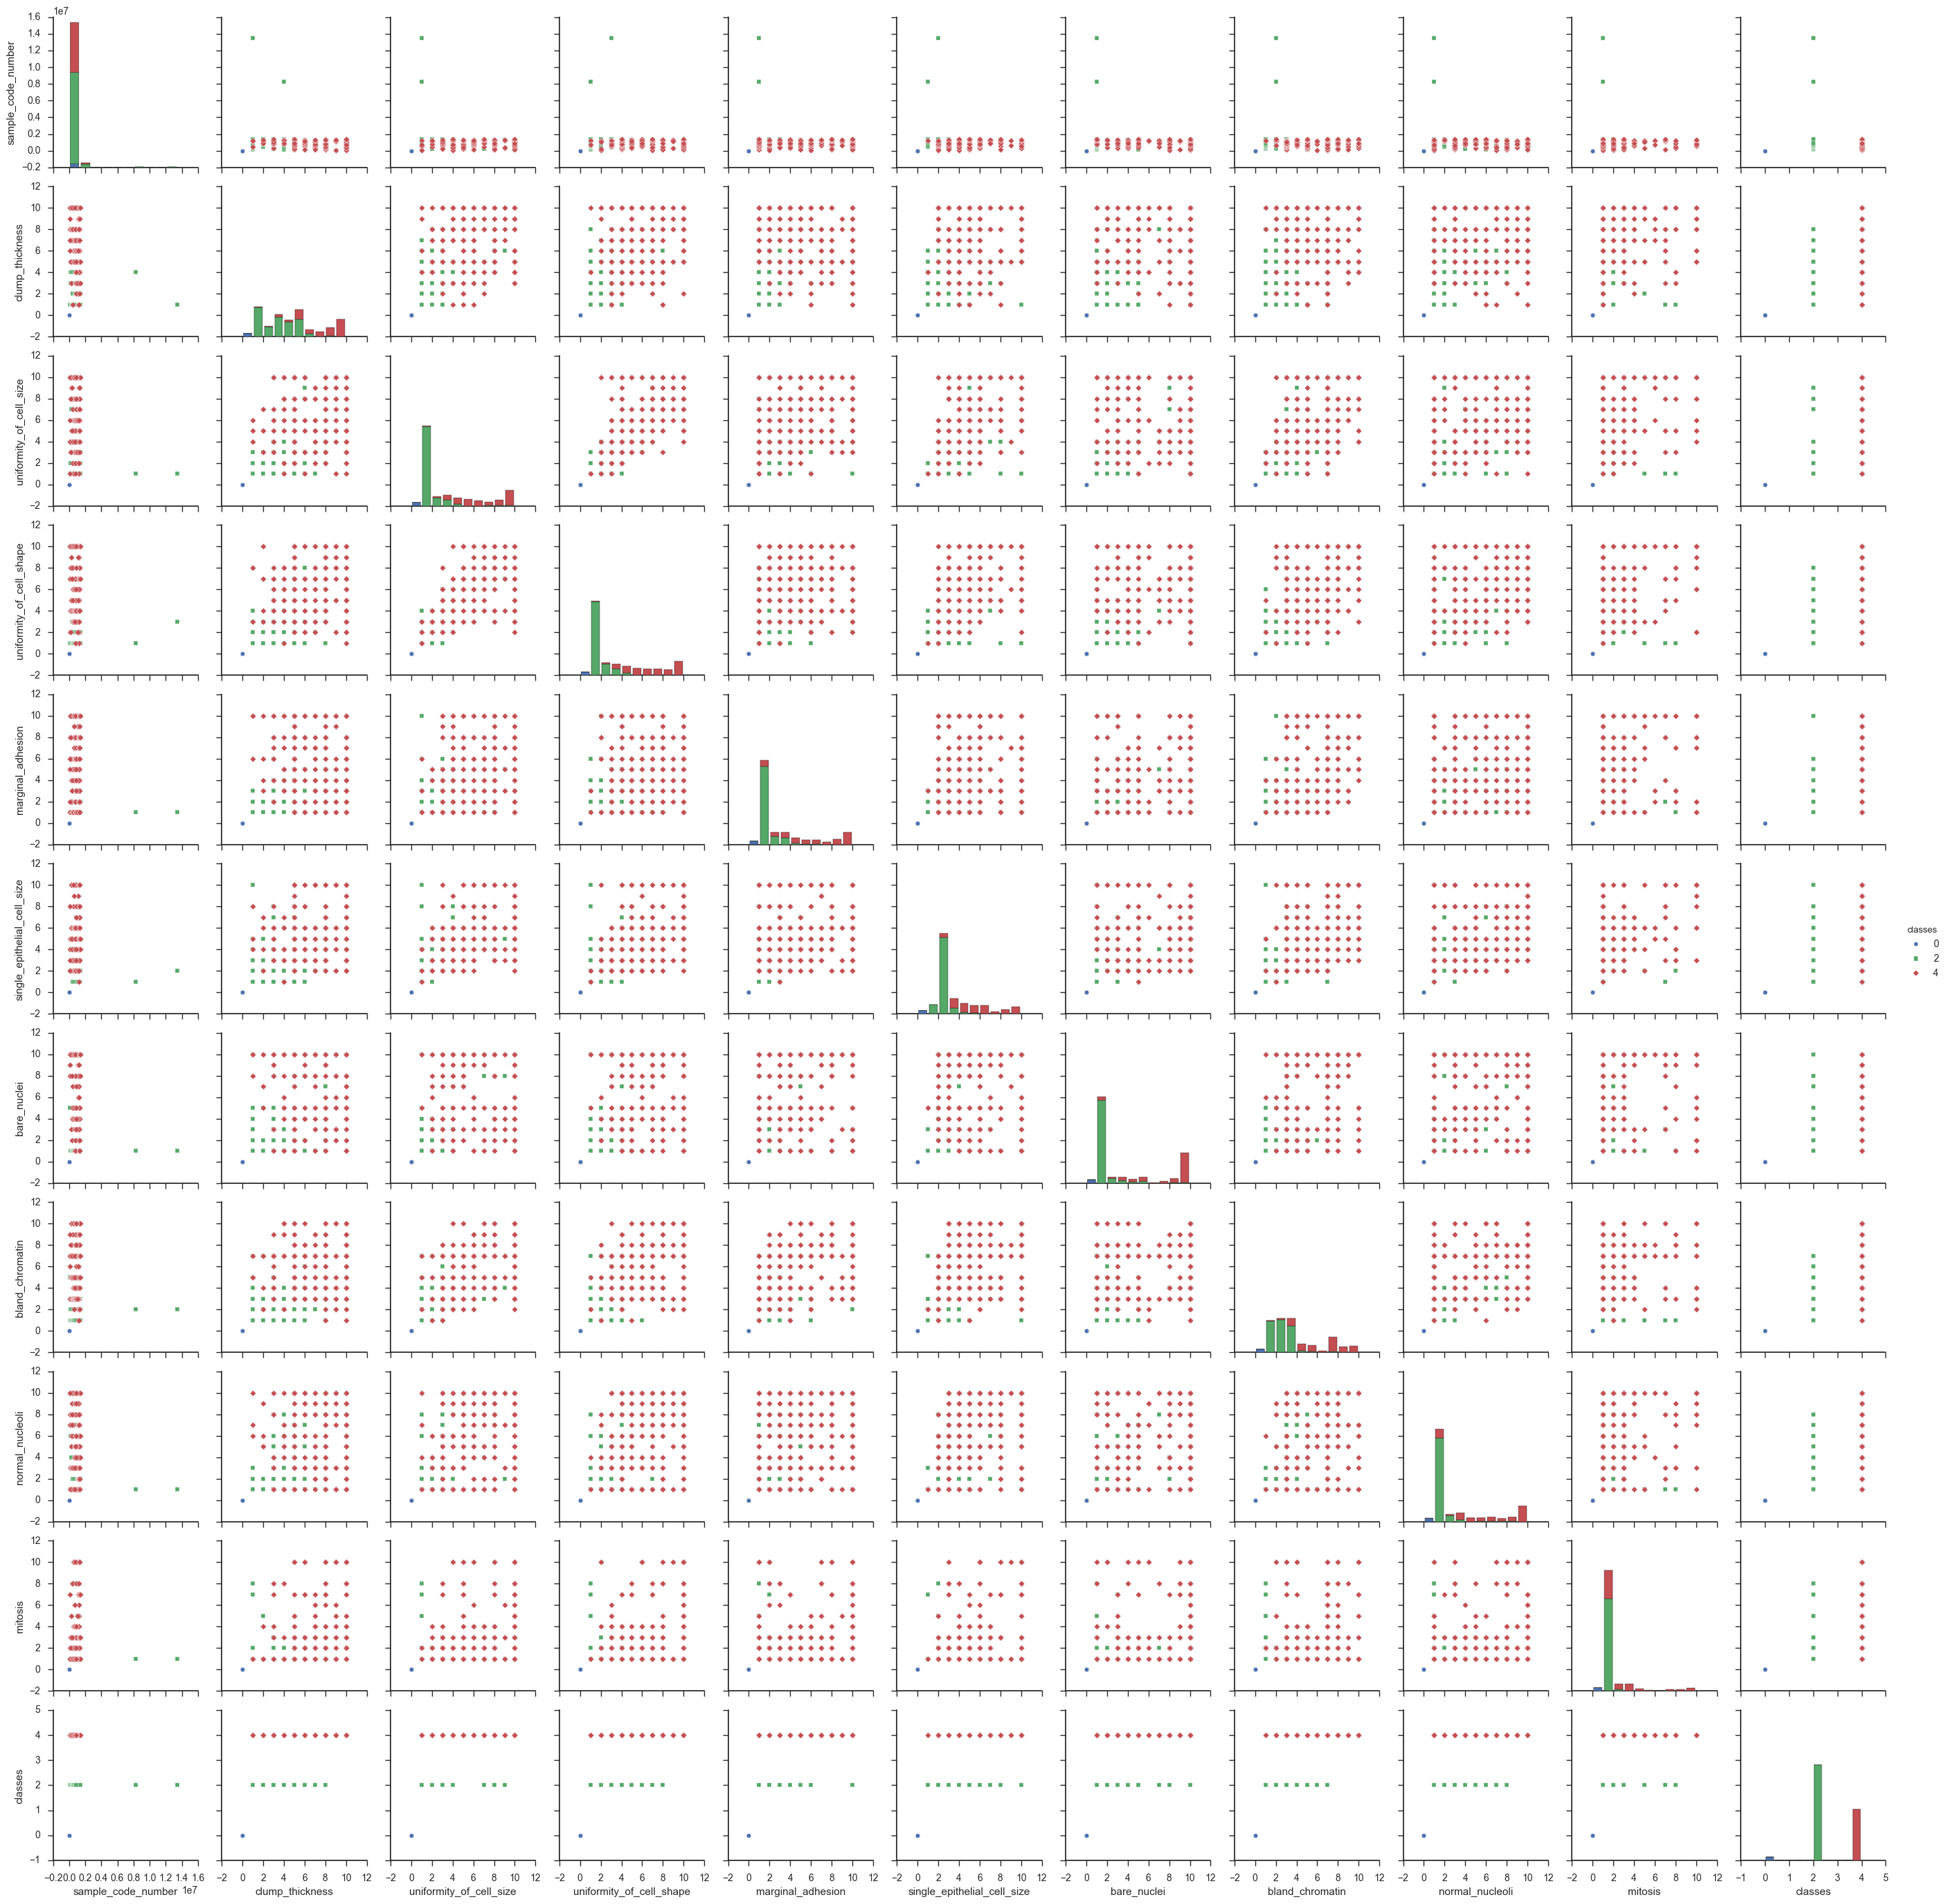

In [61]:
sns.pairplot(df, hue="classes", markers=["o", "s", "D"])